<h1 style="text-align:center;font-weight:bold;color:black;font-size:24pt">Counterfeit detection project</h1>
<h2 style="text-align:center;font-size:14pt">Project by Amir Peleg
Ofek Roodich</h2>

In [49]:
#opening the DataFrame
import pandas as pd
df = pd.read_csv('BankNote_Authentication.csv')
display(df)

classes = df['class']
features = df.drop('class', axis=1)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [50]:
import visuals as vs

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


on the next cells we will illustrate our dataset and his features, it will help to understand the data distribution

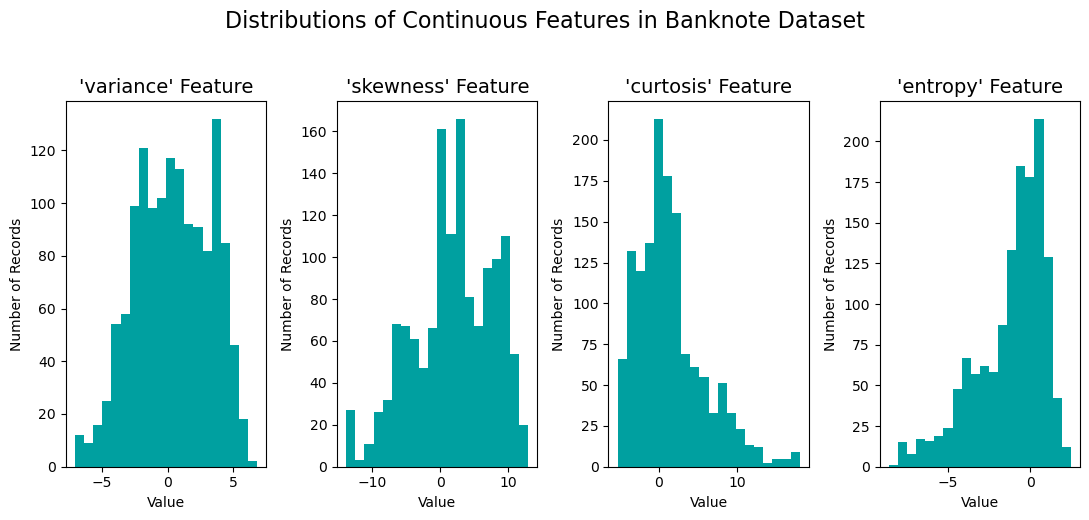

In [52]:
vs.distribution(df)

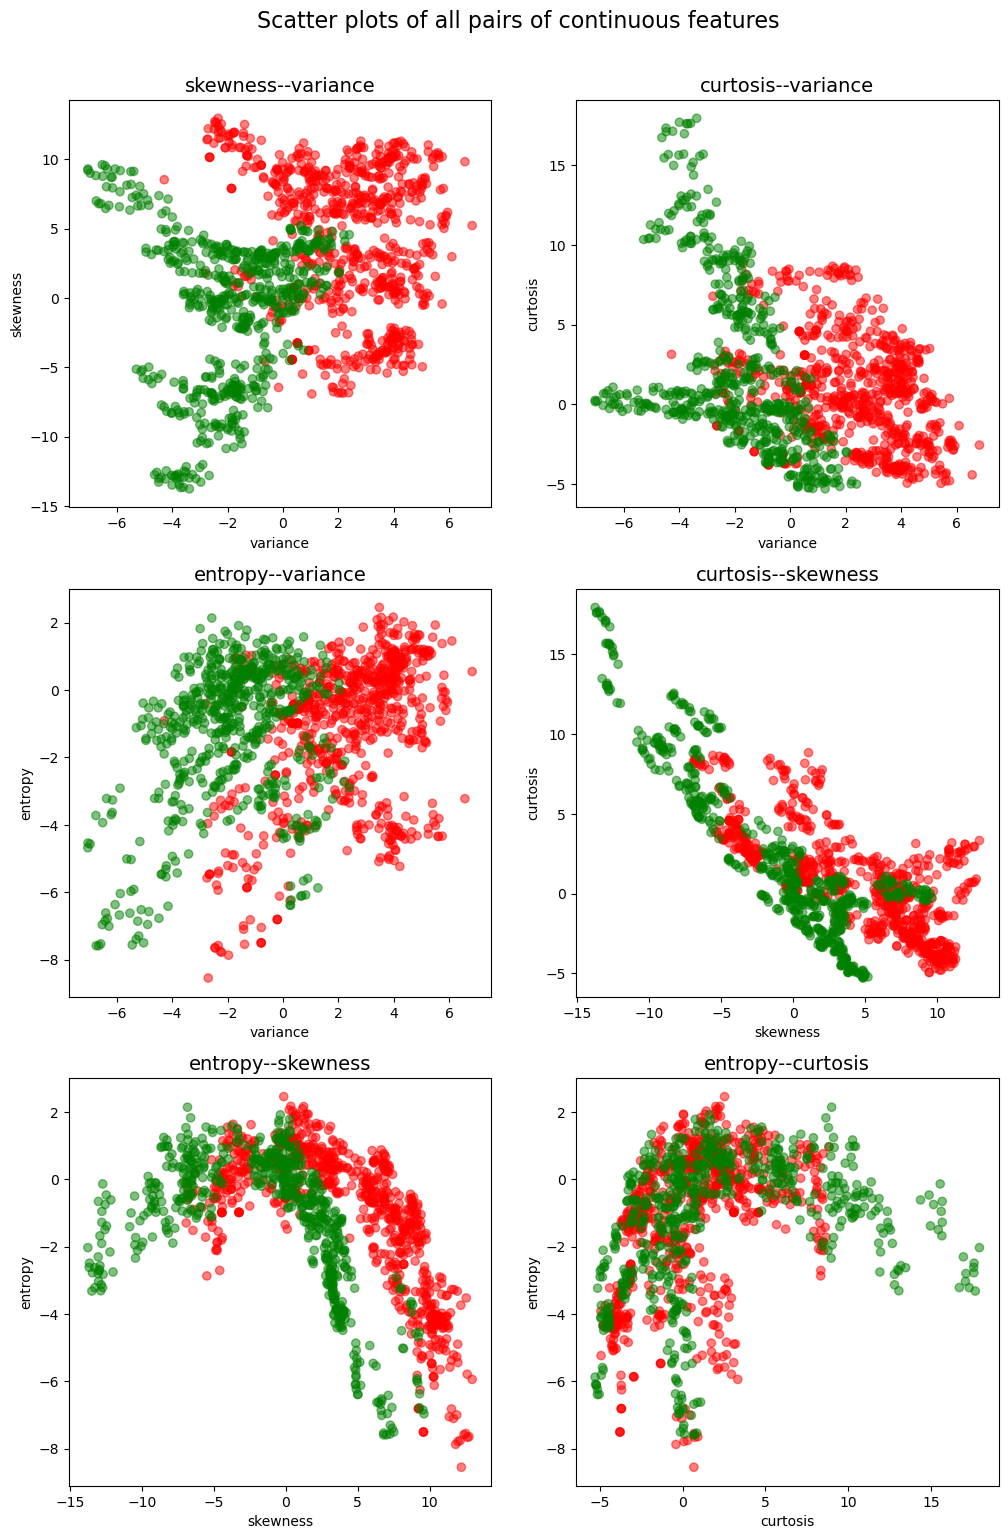

In [53]:
vs.scatter(df)

In [54]:
#dimension of the DataFrame
print("Number of rows: {}".format(df.shape[0]))
print("Number of columns: {}\n".format(df.shape[1]))

n_records = len(df)
n_fake_notes = len(df[classes == 0])
n_real_notes = len(df[classes == 1])
print("Total number of records: {}".format(n_records))
print("Total number of fake notes: {}".format(n_fake_notes))
print("Total number of real notes: {}".format(n_real_notes))

#counting the number of missing values in each column
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("\nThere are no missing values in the dataset")
else:
    print("\nThe dataset has {} missing values".format(missing_values))
    
print(df.isnull().sum())

Number of rows: 1372
Number of columns: 5

Total number of records: 1372
Total number of fake notes: 762
Total number of real notes: 610

There are no missing values in the dataset
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [55]:
#Index object representing the column labels of the DataFrame
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [56]:
#Showing information about the DataFrame
display(df.describe())

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [57]:
#setting maplotlib to show plots in the notebook and ingoring warnings
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we illustrate the division of Variance v Curtosis since it is very easy to understand and to see the difference between them

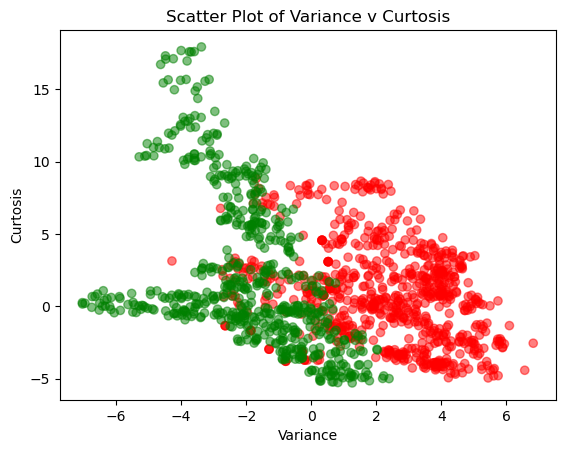

In [58]:
colors = {'0': 'red', '1': 'green'}

plt.scatter(df.variance, df.curtosis, alpha=0.5, c=df['class'].apply(lambda x: colors[str(x)]))

plt.title('Scatter Plot of Variance v Curtosis')
plt.xlabel('Variance')
plt.ylabel('Curtosis')
plt.show()

There is no obvious cluster in spherical shapes.
We had to check many K's values but we found that 9 is the optimal as we can see in the next cell

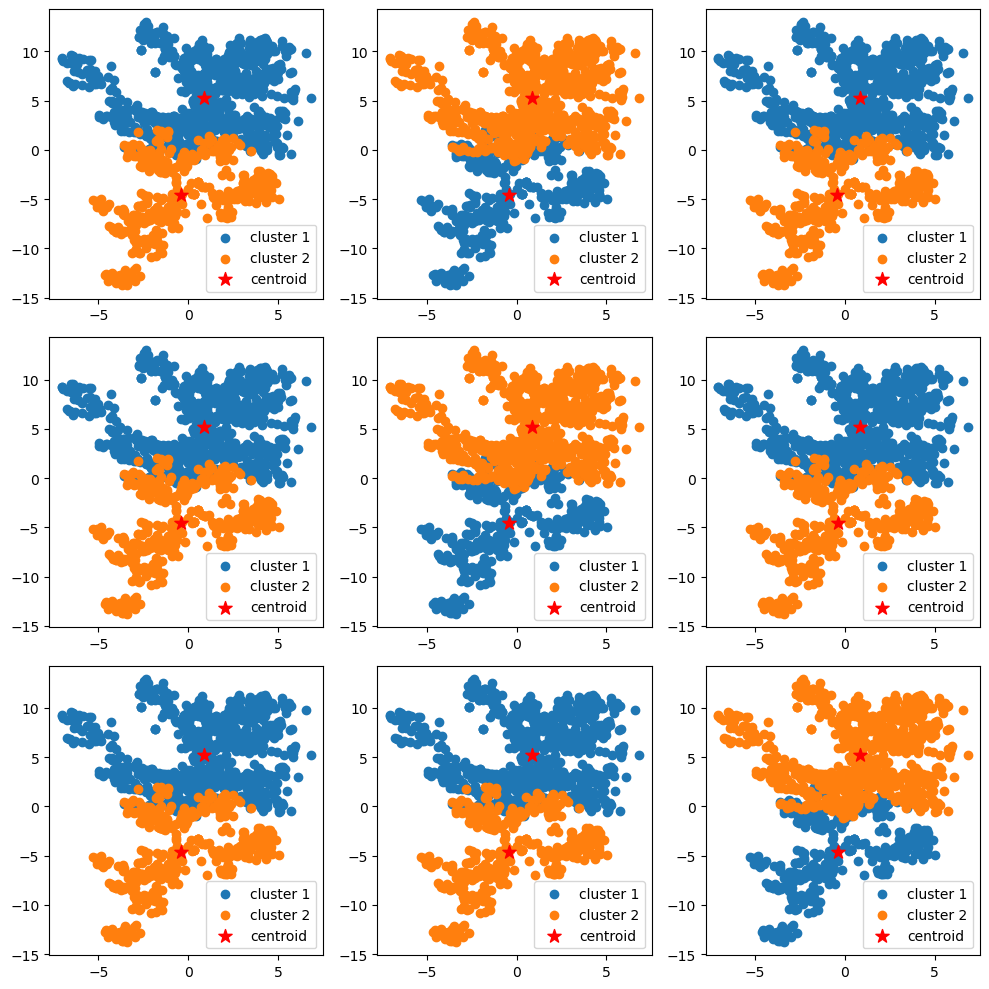

In [59]:
# k-mean implementation on dataset with a loop of iterations to check whether k mean is stable or not

import numpy as np
from sklearn.cluster import KMeans

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = np.ravel(ax)
for i in range(n_iter):
  km = KMeans(n_clusters=2,max_iter=3)
  km.fit(df)
  centroids=km.cluster_centers_
  ax[i].scatter(df[km.labels_== 0]['variance'], df[km.labels_ == 0]['skewness'],label='cluster 1')
  ax[i].scatter(df[km.labels_ == 1]['variance'], df[km.labels_ == 1]['skewness'],label='cluster 2')
  ax[i].scatter(centroids[:, 0], centroids[:, 1],c='r', marker='*', s=100, label='centroid')
  ax[i].legend()
  plt.tight_layout();

After running K-Means 9 times, the results we got are very similar, which means the K-Means is stable.

In [60]:
# cloning df into df1 and keeping only 2 feature 

df1=df.copy()
df1.drop(['curtosis','entropy','class'],axis=1,inplace=True)
df1.head()

,variance,skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


Here we illustrate the division of Variance v Skewness since it is very easy to understand and to see the difference between them

In [61]:
clusters = KMeans(2)

clusters.fit(df1)
df1['clusterid'] = clusters.labels_

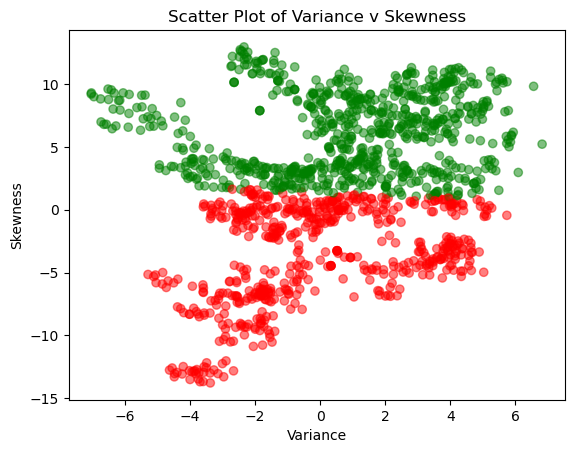

In [62]:
colors = {'0': 'red', '1': 'green'}

plt.scatter(df1.variance, df1.skewness, alpha=0.5, c=df1['clusterid'].apply(lambda x: colors[str(x)]))

plt.title('Scatter Plot of Variance v Skewness')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

In [63]:
#getting centroids of cluster
clusters.cluster_centers_

array([[-0.12376677, -3.45591266],
       [ 0.86960048,  6.12717909]])

In [64]:
df1.head()

,variance,skewness,clusterid
0,3.62160,8.6661,1
1,4.54590,8.1674,1
2,3.86600,-2.6383,0
3,3.45660,9.5228,1
4,0.32924,-4.4552,0


In [65]:
# calculating descriptive statistics for each cluster
df1.groupby( 'clusterid' ).describe()

variance                                                        \
             count      mean       std     min      25%      50%     75%   
clusterid                                                                  
0            599.0 -0.125914  2.655152 -5.2943 -2.18825 -0.65767  2.0159   
1            773.0  0.867409  2.908508 -7.0421 -0.95403  1.11660  3.1896   

                  skewness                                                \
              max    count      mean       std      min      25%     50%   
clusterid                                                                  
0          5.7403    599.0 -3.479989  3.834604 -13.7731 -6.30615 -2.9363   
1          6.8248    773.0  6.108644  3.096698   1.0367  3.25700  6.1437   

                              
                75%      max  
clusterid                     
0         -0.066226   1.6327  
1          8.794400  12.9516

In [66]:
from sklearn.preprocessing import StandardScaler

#normalization the data, 0 mean and 1 variance
scaler = StandardScaler() 
scaled_df1 = scaler.fit_transform( df1[["variance", "skewness"]] ) 

In [67]:
scaled_df1=pd.DataFrame(scaled_df1,columns=['variance','skewness'])
scaled_df1

,variance,skewness
0,1.121806,1.149455
1,1.447066,1.064453
2,1.207810,-0.777352
3,1.063742,1.295478
4,-0.036772,-1.087038
...,...,...
1367,-0.009711,-0.097693
1368,-0.641313,-1.158984
1369,-1.472357,-2.621646
1370,-1.406693,-1.756471


In [68]:
# reproducibility of results and switching ID's

clusters_new = KMeans( 2, random_state=42 ) 
clusters_new.fit(scaled_df1) 
df1["clusterid_new"] = clusters_new.labels_ 
df1.head()

,variance,skewness,clusterid,clusterid_new
0,3.62160,8.6661,1,1
1,4.54590,8.1674,1,1
2,3.86600,-2.6383,0,1
3,3.45660,9.5228,1,1
4,0.32924,-4.4552,0,0


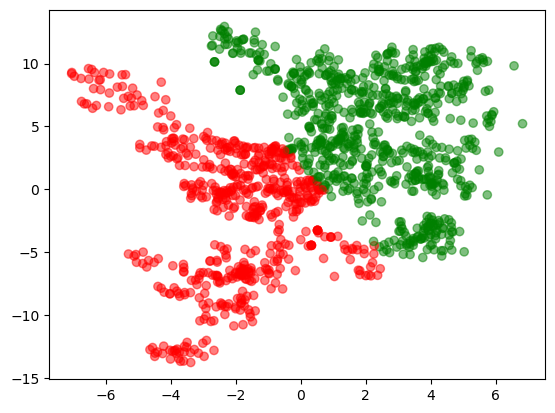

In [69]:
colors = {'0': 'red', '1': 'green'}

#plt.scatter(df1.variance, df1.skewness, alpha=0.5, c=df1['clusterid'].apply(lambda x: colors[str(x)]))

plt.scatter(df1.variance,df1.skewness,alpha=0.5, c=df1['clusterid_new'].apply(lambda x: colors[str(x)]))
plt.show()

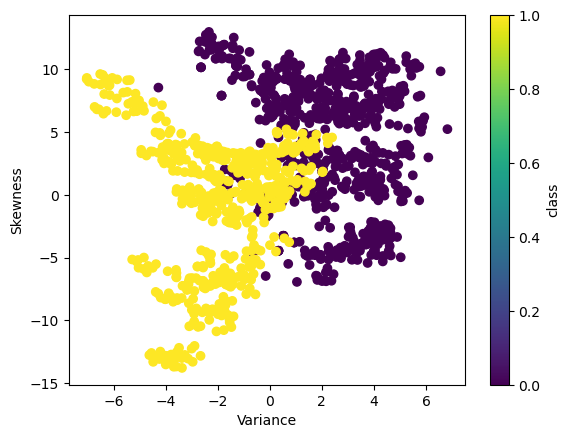

In [70]:
#visualizing the data with correct labels
plt.scatter(df['variance'],df['skewness'],c=df['class'])
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.colorbar(label='class')
plt.show()

In [71]:
# new centroids of clusters

clusters_new.cluster_centers_

array([[-0.84814093, -0.62921303],
       [ 0.65722693,  0.48757905]])

In [72]:
df1["clusterid_new"] = df1["clusterid_new"].map({0: 1, 1: 0})

In [73]:
df1.shape

(1372, 4)

In [74]:
df1=df1.reset_index()
df1

,index,variance,skewness,clusterid,clusterid_new
0,0,3.62160,8.66610,1,0
1,1,4.54590,8.16740,1,0
2,2,3.86600,-2.63830,0,0
3,3,3.45660,9.52280,1,0
4,4,0.32924,-4.45520,0,1
...,...,...,...,...,...
1367,1367,0.40614,1.34920,1,0
1368,1368,-1.38870,-4.87730,0,1
1369,1369,-3.75030,-13.45860,0,1
1370,1370,-3.56370,-8.38270,0,1


In [75]:
# evaluate the accuracy of a clustering algorithm that assigns cluster labels

correct=0
for i in range(0,1371):
  if df['class'][i]==df1['clusterid_new'][i]:
   correct=correct+1

print(correct/1372)

0.8768221574344023


Using PCA model to reduce the number of features into 2 columns

In [76]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [77]:
#normalization the data, 0 mean and 1 variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df2 = scaler.fit_transform( df[["variance", "skewness","curtosis","entropy"]]) 

In [78]:
scaled_df2=pd.DataFrame(scaled_df2,columns=['variance','skewness',"curtosis","entropy"])
scaled_df2

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [79]:
# reducing dimensionality

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_df2)
PCA_df=pd.DataFrame(pca.transform(scaled_df2),columns=(['col1','col2']))
PCA_df.head()

,col1,col2
0,-1.472805,-1.163917
1,-1.639441,-1.093812
2,0.513919,-1.324880
3,-2.310952,-0.202514
4,1.193416,0.024654


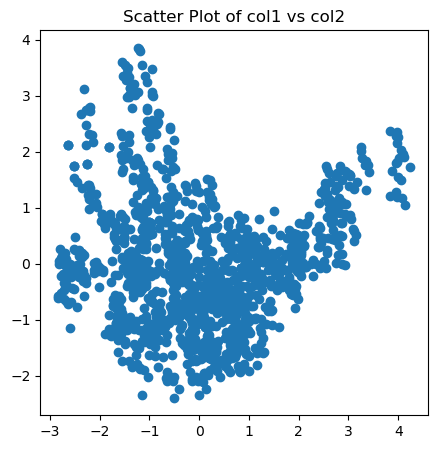

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(PCA_df['col1'],PCA_df['col2'])
plt.title('Scatter Plot of col1 vs col2')
plt.show()

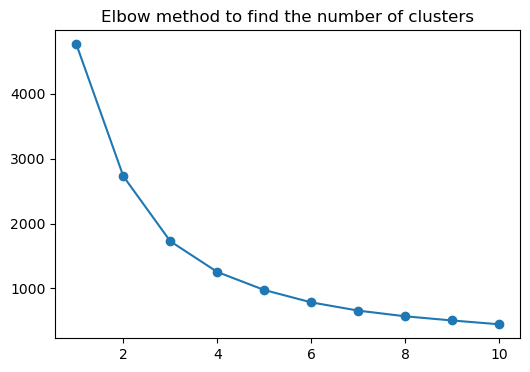

In [81]:
#determine the optimal number of clusters for KMeans

cluster_range=range(1,11)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(PCA_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('Elbow method to find the number of clusters')
plt.show()

In [82]:
# performing hierarchical clustering on a dataset represented by the PCA transformed dataframe PCA_df.

from sklearn.cluster import AgglomerativeClustering

AC=AgglomerativeClustering(n_clusters=4)
AC.fit(PCA_df)

yhat_AC=AC.fit_predict(PCA_df)
yhat_AC

array([1, 1, 0, ..., 2, 2, 2], dtype=int64)

In [83]:
PCA_df['Clusters']=yhat_AC
PCA_df

,col1,col2,Clusters
0,-1.472805,-1.163917,1
1,-1.639441,-1.093812,1
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,1
4,1.193416,0.024654,2
...,...,...,...
1367,-0.221995,-0.290458,0
1368,1.909395,0.142149,2
1369,4.049327,2.036023,2
1370,3.019617,1.392140,2


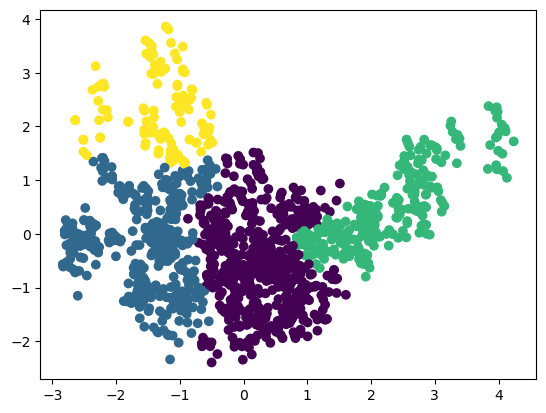

In [84]:
plt.scatter(PCA_df['col1'],PCA_df['col2'],c=PCA_df['Clusters'])
plt.show()

Training the Model with the dataset

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import regularizers

model = Sequential()


# load dataset
df = pd.read_csv("C:\\Users\\amirp\\Desktop\\Studies\\שנה ג\\Usd counterfeit Final Project\\BankNote_Authentication.csv")

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1), df['class'], test_size=0.2)

# build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, input_dim=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=300, validation_data=(X_test, y_test), callbacks=[checkpoint], verbose = 0)

# evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)


# save the final model
model.save('model.h5')

print("Model saved into model.h5 file")



Model saved into model.h5 file


In [86]:
def detect_image(predicted_class,img):
    # Load image 
    image = cv2.imread(img)

    # Check if image has been loaded correctly
    if image is None:
        print("Error: Could not load image")
        return
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (21, 21), 0)

    fig, ax = plt.subplots(figsize=(10, 10))
    heatmap = ax.imshow(gray_blur, cmap='inferno')
    fig.colorbar(heatmap, ax=ax)

    # Display the heatmap
    plt.show()

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours in the binary image
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on original image
        # Calculate spread of largest contour
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    spread = w / h

    # Draw contours on original image
    img_copy = image.copy()
    if predicted_class<=0.5:
        colors_tuple = (0, 0, 255)
    else:
        colors_tuple = (0, 255, 0)
    cv2.drawContours(img_copy, contours, -1, colors_tuple, 2)
    print("Number of contours found:", len(contours))
    print("Spread of largest contour:", spread)


    # Display the image with detected contours
    cv2.namedWindow("Detected Contours", cv2.WINDOW_NORMAL)
    cv2.resizeWindow("Detected Contours", img_copy.shape[1], img_copy.shape[0])
    cv2.imshow("Detected Contours", img_copy)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [87]:
#pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 0s 162ms/step
Predicted Class Label: [[0.93401057]]
Predicted Class Probabilities 0 for fake|1 for original
var: 2.494166098774001
ske: -1.0542639657844792
kurt Class Label: 0.15001582359631893
entropy_val: 5.128408066060884
Real note


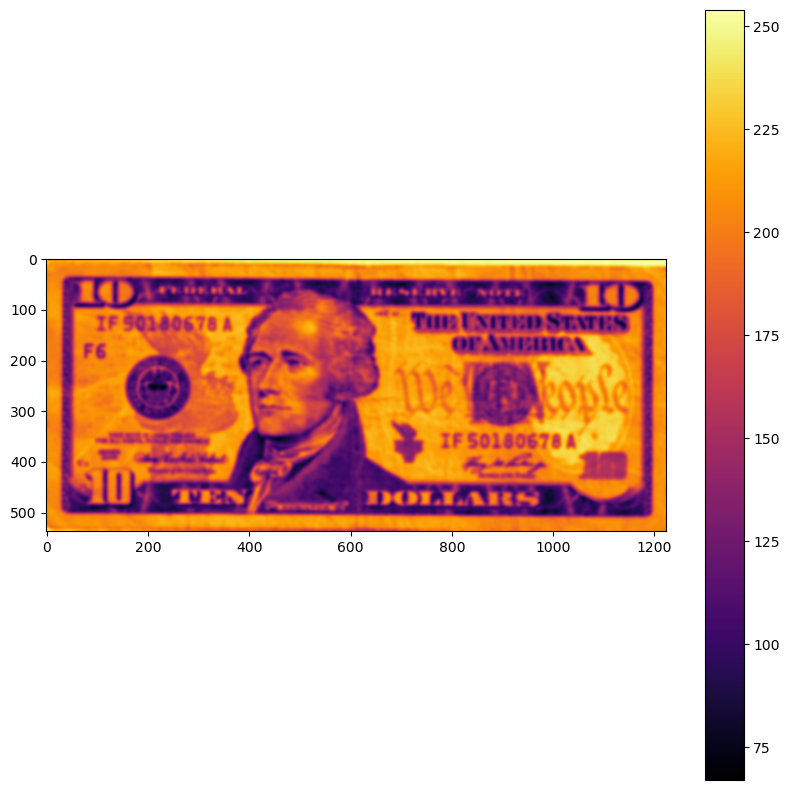

Number of contours found: 16305
Spread of largest contour: 2.2793296089385473


In [91]:
import cv2
import numpy as np
from keras.models import load_model
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import *
from keras.models import load_model
from tensorflow import keras
import h5py
import matplotlib.pyplot as plt



def preprocess_image(image):
    # Load the trained model
    with h5py.File("C:\\Users\\amirp\\Desktop\\Studies\\שנה ג\\Usd counterfeit Final Project\\model.h5", 'r') as f:
    # Load the model architecture
        model = load_model(f, compile=False)

    # Resize the image to 64x64 pixels
    resized_image = cv2.resize(image, (64, 64))
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    # Flatten the image to a 1D array
    flattened_image = gray_image.flatten()
    # Normalize the image by dividing each pixel value by 255
    normalized_image = flattened_image / 255.0
    # Add two extra zeros to the end of the flattened image to make it a 1D array of four features
    feature_vector = np.concatenate([normalized_image, [0, 0]])
    

    var = np.var(flattened_image)/1372
    skewness = skew(flattened_image.reshape(-1))
    kurt = kurtosis(flattened_image.reshape(-1))
    hist, _ = np.histogram(flattened_image, bins=256)
    entropy_val = entropy(hist)

    # Predict the class label for the image
    img_features = [[var, skewness, kurt, entropy_val]]
    predicted_class = model.predict(img_features)

    # Print the predicted class label
    print("Predicted Class Label:", predicted_class)
    print("Predicted Class Probabilities 0 for fake|1 for original")
    print("var:", var)
    print("ske:", skewness)
    print("kurt Class Label:", kurt)
    print("entropy_val:", entropy_val)
    
    # output the prediction
    if predicted_class <= 0.75:
        print("Fake note")
    else:
        print("Real note")
        
    detect_image(predicted_class,path)
    ##############################

    return predicted_class


# Load the image
path = "Example.jpg"
image = cv2.imread(path)
# Preprocess the image dand get reulst
feature_vector = preprocess_image(image)

In [ ]:
# import os
# import glob

# num_of_photos = 50
# os.chdir("C:\\Users\\amirp\\Desktop\\Studies\\שנה ג\\Usd counterfeit Final Project\\original")
# picture_files = glob.glob("*.jpg")
# photos = picture_files[:num_of_photos]
# sum=0

# for image in photos:

#     # # Load the image
#     # path = 'cat.png'
#     img = cv2.imread(image) #enter path and reload this block 
#     # Preprocess the image
#     feature_vector = preprocess_image(img)
#     sum+=feature_vector
    
# sum/=num_of_photos

# print(sum)